In [1]:
!pip install pystan

    100% |████████████████████████████████| 48.0MB 443kB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
data = pd.read_excel('./NP BI Interview project 2018.xlsx', sheetname='O&D Passenger Data')

In [4]:
data.head()

,Airline,Org,Dst,Date,Passengers per Day,Fare,Gross Fare,Revenue
0,4O,SEA,GDL,Q3 2016,0.055,219.000000,262,12.045
1,5T,SEA,YZF,Q1 2016,0.060,461.000000,513,27.660
2,AA,SEA,ABE,Q1 2016,1.045,283.291866,326.545,296.040
3,AA,SEA,ABE,Q2 2016,2.050,202.287805,236.968,414.690
4,AA,SEA,ABE,Q3 2016,1.990,248.321608,286.063,494.160


In [5]:
data.describe()

,Passengers per Day,Fare,Revenue
count,11593.000000,11593.000000,1.159300e+04
mean,29.256318,262.766209,5.015127e+03
std,360.256347,154.265048,6.134577e+04
min,0.050000,30.000000,1.500000e+00
25%,0.330000,186.131030,9.026000e+01
50%,2.255000,243.364943,5.532550e+02
75%,10.890000,301.908069,2.404055e+03
max,37704.133162,6566.000000,6.463211e+06


In [6]:
data['Date'].replace('Q3 2016', '09/30/2016',inplace=True)

In [7]:
data['Date'].replace('Q1 2016', '03/31/2016',inplace=True)
data['Date'].replace('Q2 2016', '06/30/2016',inplace=True)
data['Date'].replace('Q4 2016', '12/31/2016',inplace=True)
data['Date'].replace('Q1 2017', '03/31/2017',inplace=True)
data['Date'].replace('Q2 2017', '06/30/2017',inplace=True)
data['Date'].replace('Q3 2017', '09/30/2017',inplace=True)
data['Date'].replace('Q4 2017', '12/31/2017',inplace=True)

In [8]:
data.head(20)

,Airline,Org,Dst,Date,Passengers per Day,Fare,Gross Fare,Revenue
0,4O,SEA,GDL,09/30/2016,0.055,219.000000,262,12.045
1,5T,SEA,YZF,03/31/2016,0.060,461.000000,513,27.660
2,AA,SEA,ABE,03/31/2016,1.045,283.291866,326.545,296.040
3,AA,SEA,ABE,06/30/2016,2.050,202.287805,236.968,414.690
4,AA,SEA,ABE,09/30/2016,1.990,248.321608,286.063,494.160
5,AA,SEA,ABE,12/31/2016,0.655,274.564885,314.824,179.840
6,AA,SEA,ABE,03/31/2017,0.315,241.031746,273.381,75.925
7,AA,SEA,ABE,06/30/2017,0.310,390.548387,438.806,121.070
8,AA,SEA,ABE,09/30/2017,1.790,227.184358,262.534,406.660
9,AA,SEA,ABE,12/31/2017,0.595,259.613445,301.605,154.470


In [9]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [10]:
data.head()

,Airline,Org,Dst,Date,Passengers per Day,Fare,Gross Fare,Revenue
0,4O,SEA,GDL,2016-09-30,0.055,219.000000,262,12.045
1,5T,SEA,YZF,2016-03-31,0.060,461.000000,513,27.660
2,AA,SEA,ABE,2016-03-31,1.045,283.291866,326.545,296.040
3,AA,SEA,ABE,2016-06-30,2.050,202.287805,236.968,414.690
4,AA,SEA,ABE,2016-09-30,1.990,248.321608,286.063,494.160


In [11]:
data.dtypes

Airline                       object
Org                           object
Dst                           object
Date                  datetime64[ns]
Passengers per Day           float64
Fare                         float64
Gross Fare                    object
Revenue                      float64
dtype: object

In [12]:
data.set_index('Date',inplace=True)

In [13]:
data.head()

,Airline,Org,Dst,Passengers per Day,Fare,Gross Fare,Revenue
Date,,,,,,,
2016-09-30,4O,SEA,GDL,0.055,219.000000,262,12.045
2016-03-31,5T,SEA,YZF,0.060,461.000000,513,27.660
2016-03-31,AA,SEA,ABE,1.045,283.291866,326.545,296.040
2016-06-30,AA,SEA,ABE,2.050,202.287805,236.968,414.690
2016-09-30,AA,SEA,ABE,1.990,248.321608,286.063,494.160


In [14]:
data.sort_index()

,Airline,Org,Dst,Passengers per Day,Fare,Gross Fare,Revenue
Date,,,,,,,
2016-03-31,UA,SEA,BWI,14.000000,201.599643,235.069,2.822395e+03
2016-03-31,UA,SEA,ACV,3.675000,233.976871,268.864,8.598650e+02
2016-03-31,AA,SEA,SAV,4.965000,280.539778,320.188,1.392880e+03
2016-03-31,UA,SEA,AEX,1.950000,280.766667,321.941,5.474950e+02
2016-03-31,AS,SEA,SUX,0.165000,240.333333,273,3.965500e+01
2016-03-31,UA,SEA,AGU,0.560000,337.571429,402.071,1.890400e+02
2016-03-31,AA,SEA,SAT,22.285000,206.989904,241.898,4.612770e+03
2016-03-31,UA,SEA,ALB,8.030000,243.310087,280.233,1.953780e+03
2016-03-31,AA,SEA,SAN,6.385000,131.195771,158.997,8.376850e+02


In [15]:
data['Airline'].unique()

array(['4O', '5T', 'AA', 'AC', 'AF', 'AM', 'AS', 'AV', 'AY', 'B6', 'BA',
       'CX', 'CZ', 'DL', 'EK', 'F9', 'FI', 'G4', 'HA', 'IB', 'KE', 'KL',
       'KS', 'LA', 'LH', 'MU', 'NH', 'NK', 'NZ', 'OO', 'OZ', 'QF', 'SA',
       'SK', 'SN', 'SY', 'TK', 'TP', 'UA', 'VA', 'VS', 'VW', 'WN', 'WS',
       'Y4', nan,
       'Diio Mi U.S. DOT O&D Summary Report run on May 18, 2018 by AS-NF with Parameters:'], dtype=object)

In [16]:
alaska = data[data['Airline'] == 'AS']

In [17]:
alaska.head()

,Airline,Org,Dst,Passengers per Day,Fare,Gross Fare,Revenue
Date,,,,,,,
2016-06-30,AS,SEA,ABE,0.055,265.000000,291,14.575
2017-03-31,AS,SEA,ABE,0.170,452.117647,508.529,76.860
2017-09-30,AS,SEA,ABE,0.055,265.000000,291,14.575
2016-03-31,AS,SEA,ABI,0.115,166.000000,198,19.090
2016-06-30,AS,SEA,ABI,0.115,217.000000,253,24.955


In [18]:
alaska.sort_index()

,Airline,Org,Dst,Passengers per Day,Fare,Gross Fare,Revenue
Date,,,,,,,
2016-03-31,AS,SEA,EWN,0.055000,1185.000000,1303,65.175000
2016-03-31,AS,SEA,YUM,0.110000,242.500000,294.5,26.675000
2016-03-31,AS,SEA,SBP,1.725000,237.257971,274.038,409.270000
2016-03-31,AS,SEA,GPT,0.110000,223.000000,252.5,24.530000
2016-03-31,AS,SEA,BTV,0.330000,346.500000,384.333,114.345000
2016-03-31,AS,SEA,GRB,0.585000,329.170940,373.872,192.565000
2016-03-31,AS,SEA,SBA,52.760000,148.793973,171.375,7850.370000
2016-03-31,AS,SEA,GRK,0.495000,245.959596,275.253,121.750000
2016-03-31,AS,SEA,BTR,0.115000,402.826087,457.087,46.325000


In [19]:
grouped = alaska.groupby('Date').agg(sum)

In [20]:
grouped.head()

,Passengers per Day,Fare,Revenue
Date,,,
2016-03-31,15540.235340,86535.740277,2.395633e+06
2016-06-30,17616.285097,91800.399494,2.754330e+06
2016-09-30,18349.987179,90279.723090,2.845116e+06
2016-12-31,16905.285342,87763.528247,2.613508e+06
2017-03-31,16753.710702,84084.710851,2.523960e+06


In [21]:
grouped.tail()

,Passengers per Day,Fare,Revenue
Date,,,
2016-12-31,16905.285342,87763.528247,2.613508e+06
2017-03-31,16753.710702,84084.710851,2.523960e+06
2017-06-30,18895.411891,93320.988818,3.066539e+06
2017-09-30,18968.575887,99759.688374,3.012099e+06
2017-12-31,17843.765837,87927.446307,2.732189e+06


# Exploring the Data

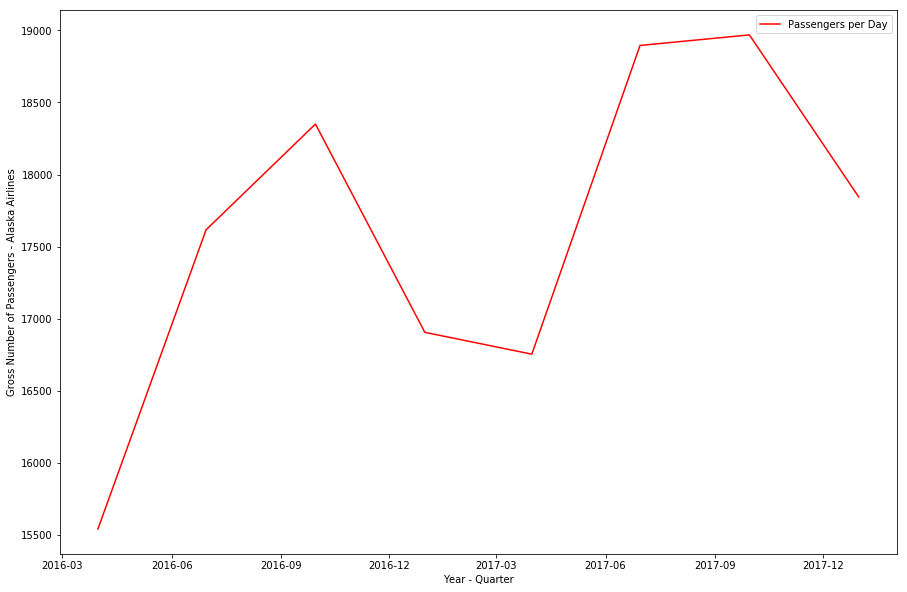

In [22]:
fig, ax = plt.subplots(figsize =(15,10))
plt.plot(grouped['Passengers per Day'], color='r')
plt.xlabel("Year - Quarter")
plt.ylabel('Gross Number of Passengers - Alaska Airlines')
plt.legend();

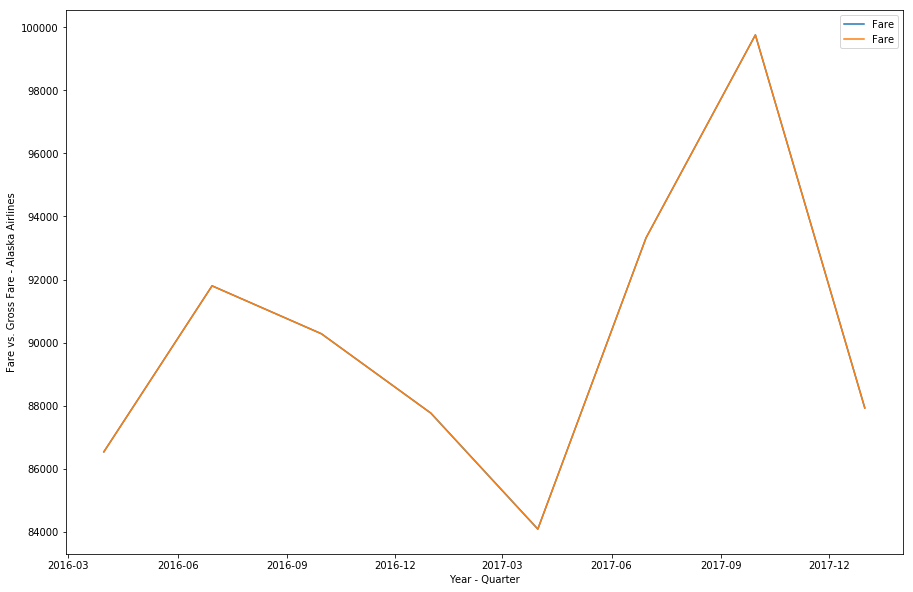

In [24]:
fig, ax = plt.subplots(figsize =(15,10))
plt.plot(grouped['Fare'])
plt.plot(grouped['Fare'])
#plt.plot(grouped['Revenue'])
plt.xlabel("Year - Quarter")
plt.ylabel('Fare vs. Gross Fare - Alaska Airlines')
plt.legend();

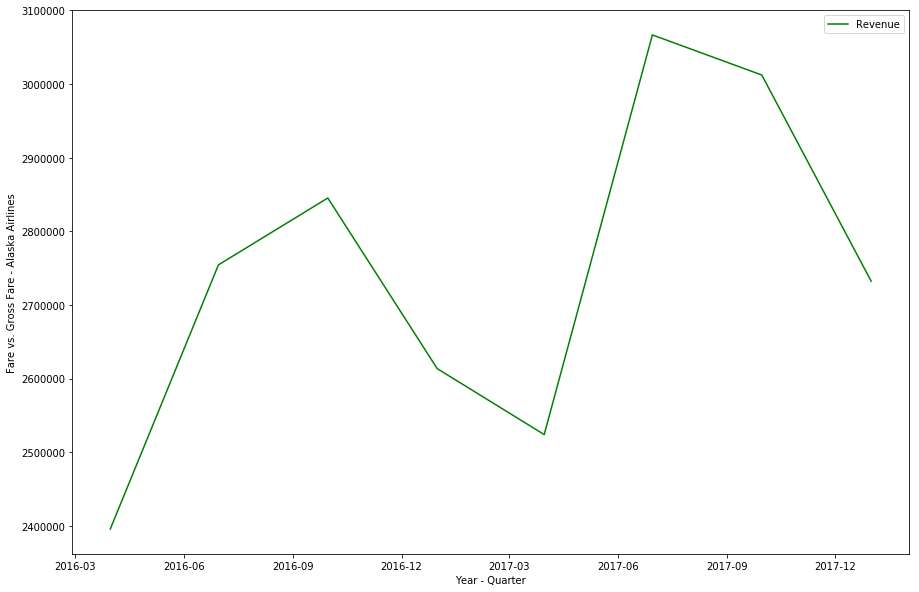

In [25]:
fig, ax = plt.subplots(figsize =(15,10))
plt.plot(grouped['Revenue'], color='g')
plt.xlabel("Year - Quarter")
plt.ylabel('Fare vs. Gross Fare - Alaska Airlines')
plt.legend();

# Creating Time Series Analysis 

## Test for Trend and Stationarity 

In [26]:
grouped_passengers_AS = grouped['Passengers per Day']

In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=2,center=False)
    rolstd = pd.rolling_std(timeseries,window=2,center=False)

    #Plot rolling statistics:
    fig, ax = plt.subplots(figsize =(20,10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.ylabel('Total Number of Passengers')
    plt.xlabel('Date')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, maxlag=4, autolag='BIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).std()
  


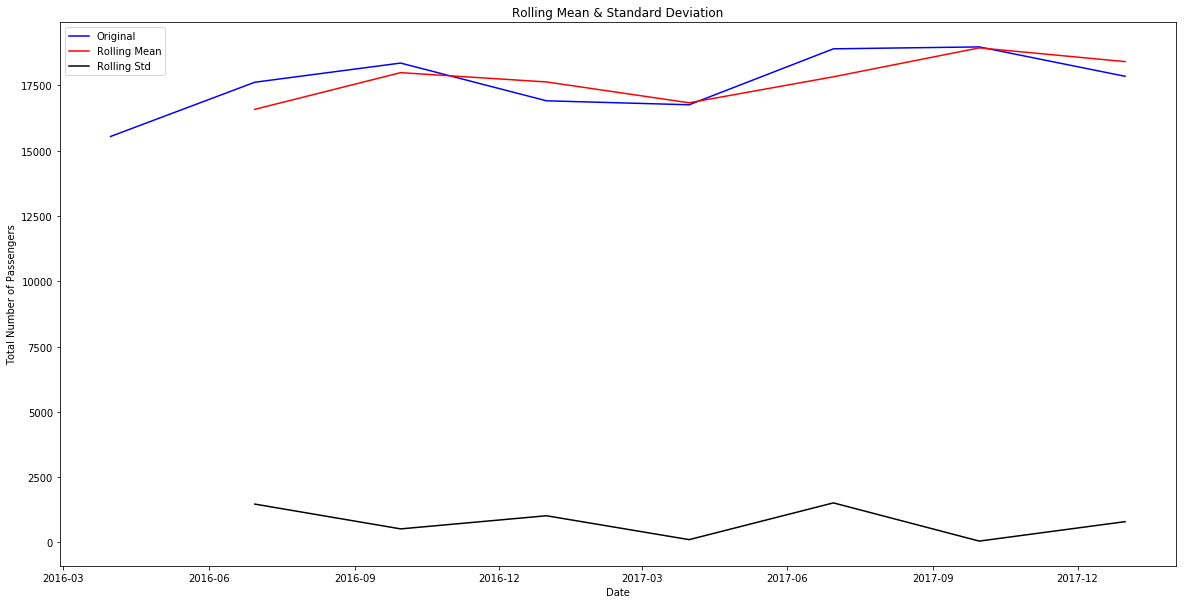

Results of Dickey-Fuller Test:
Test Statistic                 0.259674
p-value                        0.975417
#Lags Used                     2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


In [28]:
test_stationarity(grouped_passengers_AS)

## Log the Passenger Data

In [29]:
log_grouped_passengers_AS = np.log(grouped_passengers_AS)

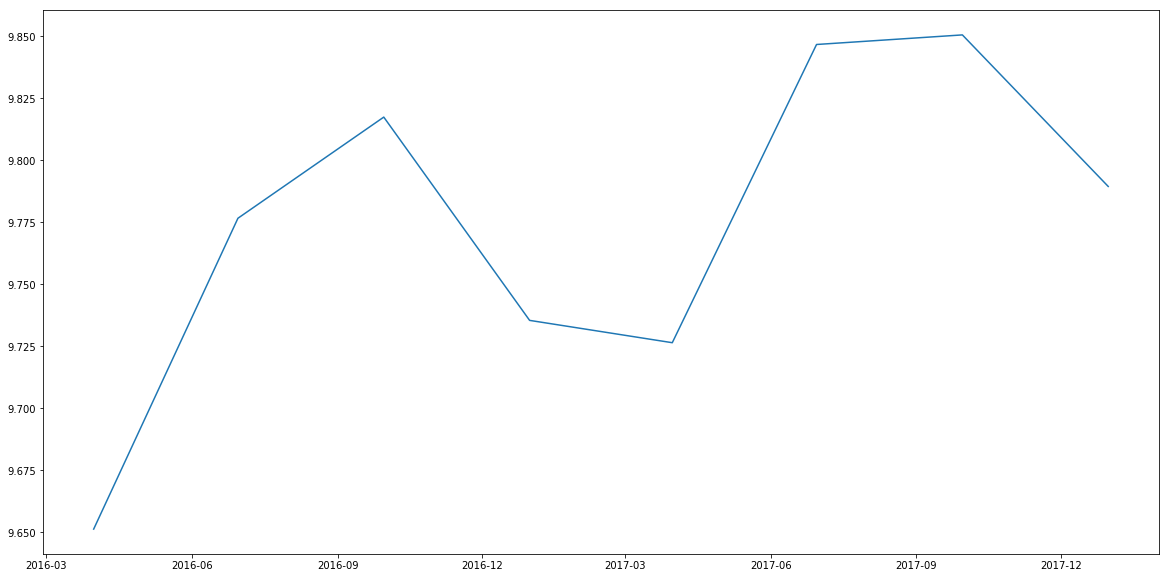

In [30]:
fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_grouped_passengers_AS);

## Decomposition Model

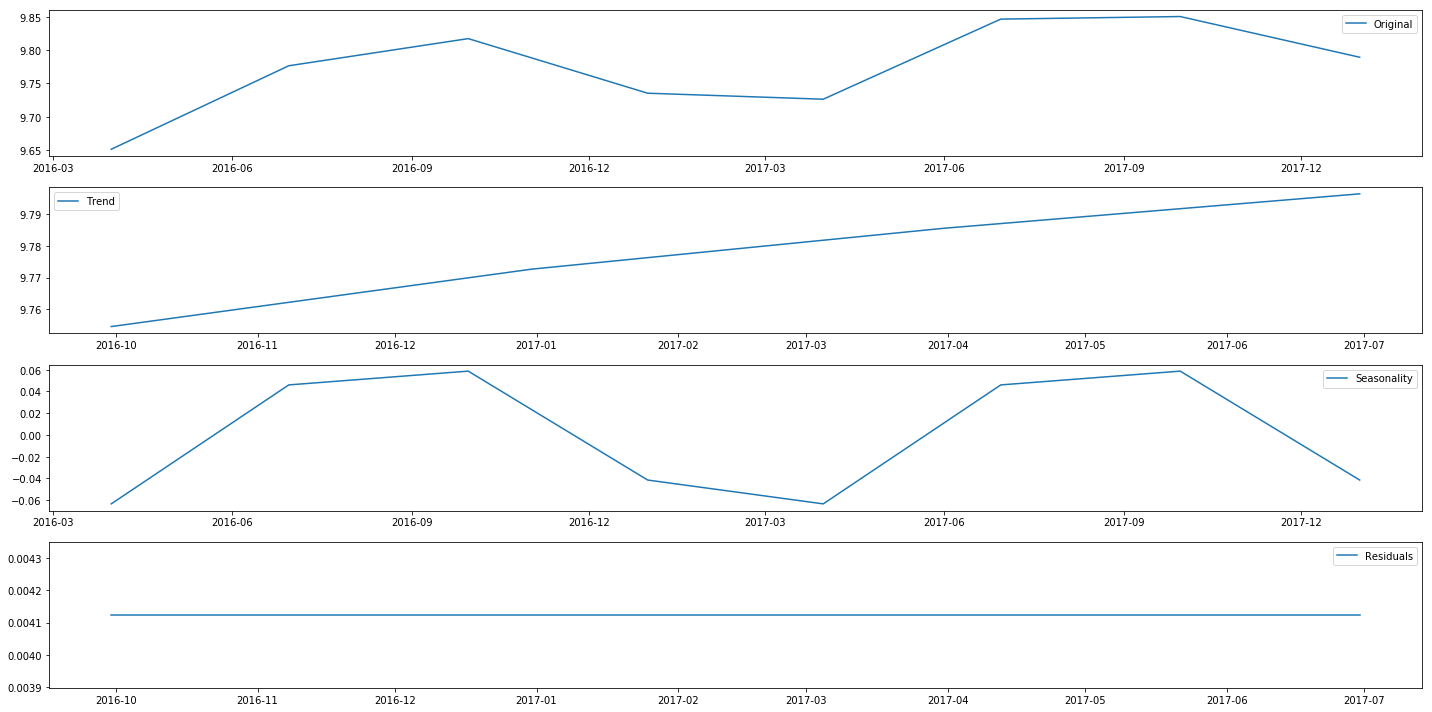

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_grouped_passengers_AS)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, ax = plt.subplots(figsize =(20,10))
plt.subplot(411)
plt.plot(log_grouped_passengers_AS, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [32]:
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot

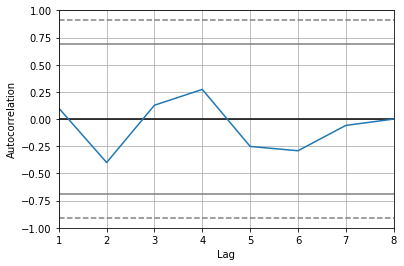

In [36]:
autocorrelation_plot(log_grouped_passengers_AS);

In [37]:
model = ARIMA(log_grouped_passengers_AS, order=(1,1,0))

model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Passengers per Day   No. Observations:                    7
Model:                   ARIMA(1, 1, 0)   Log Likelihood                   8.172
Method:                         css-mle   S.D. of innovations              0.075
Date:                  Mon, 09 Jul 2018   AIC                            -10.343
Time:                          18:26:25   BIC                            -10.506
Sample:                      06-30-2016   HQIC                           -12.349
                           - 12-31-2017                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0197      0.028      0.696      0.517      -0.036       0.075
ar.L1.D.Passengers per Day    -0.0071      0.453     -0.016      0.

              0
count  7.000000
mean   0.000107
std    0.081329
min   -0.101574
25%   -0.055207
50%   -0.015141
75%    0.061105
max    0.105670


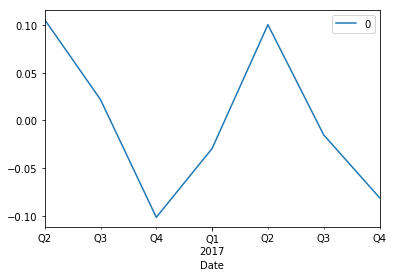

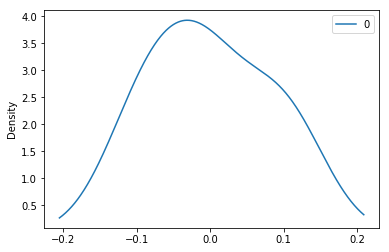

In [38]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [39]:
next_two_periods_AS = np.exp(model_fit.forecast(steps=2)[0])
next_two_periods_AS

array([ 18209.62290356,  18572.22170119])

# Finding the Rest of the Airlines

In [40]:
data.head()

,Airline,Org,Dst,Passengers per Day,Fare,Gross Fare,Revenue
Date,,,,,,,
2016-09-30,4O,SEA,GDL,0.055,219.000000,262,12.045
2016-03-31,5T,SEA,YZF,0.060,461.000000,513,27.660
2016-03-31,AA,SEA,ABE,1.045,283.291866,326.545,296.040
2016-06-30,AA,SEA,ABE,2.050,202.287805,236.968,414.690
2016-09-30,AA,SEA,ABE,1.990,248.321608,286.063,494.160


In [41]:
others = data[data['Airline'] != 'AS']

In [42]:
others['Airline'].unique()

array(['4O', '5T', 'AA', 'AC', 'AF', 'AM', 'AV', 'AY', 'B6', 'BA', 'CX',
       'CZ', 'DL', 'EK', 'F9', 'FI', 'G4', 'HA', 'IB', 'KE', 'KL', 'KS',
       'LA', 'LH', 'MU', 'NH', 'NK', 'NZ', 'OO', 'OZ', 'QF', 'SA', 'SK',
       'SN', 'SY', 'TK', 'TP', 'UA', 'VA', 'VS', 'VW', 'WN', 'WS', 'Y4',
       nan,
       'Diio Mi U.S. DOT O&D Summary Report run on May 18, 2018 by AS-NF with Parameters:'], dtype=object)

In [43]:
others.head()

,Airline,Org,Dst,Passengers per Day,Fare,Gross Fare,Revenue
Date,,,,,,,
2016-09-30,4O,SEA,GDL,0.055,219.000000,262,12.045
2016-03-31,5T,SEA,YZF,0.060,461.000000,513,27.660
2016-03-31,AA,SEA,ABE,1.045,283.291866,326.545,296.040
2016-06-30,AA,SEA,ABE,2.050,202.287805,236.968,414.690
2016-09-30,AA,SEA,ABE,1.990,248.321608,286.063,494.160


In [44]:
others = others.groupby('Date').agg(sum)

In [45]:
others.head()

,Passengers per Day,Fare,Revenue
Date,,,
2016-03-31,14488.323868,274035.877236,2.728410e+06
2016-06-30,20517.652225,291902.629763,3.768444e+06
2016-09-30,24857.141120,296182.015969,4.461718e+06
2016-12-31,18786.484496,285837.760479,3.441315e+06
2017-03-31,15638.112158,277219.914762,2.887652e+06




## Exploring the Data

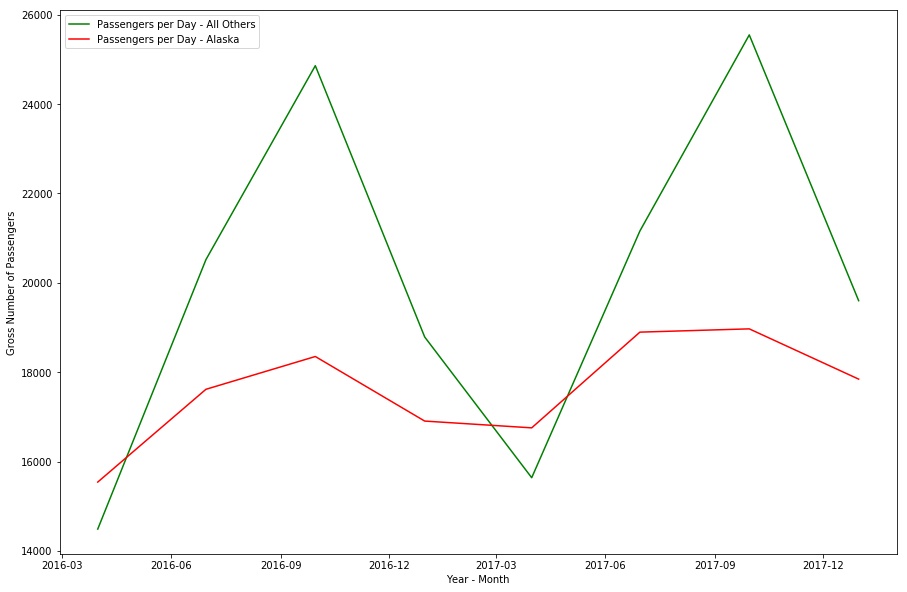

In [46]:
fig, ax = plt.subplots(figsize =(15,10))
plt.plot(others['Passengers per Day'],label='Passengers per Day - All Others', color='g')
plt.plot(grouped['Passengers per Day'],label='Passengers per Day - Alaska', color='r')
plt.xlabel("Year - Month")
plt.ylabel('Gross Number of Passengers')
plt.legend();

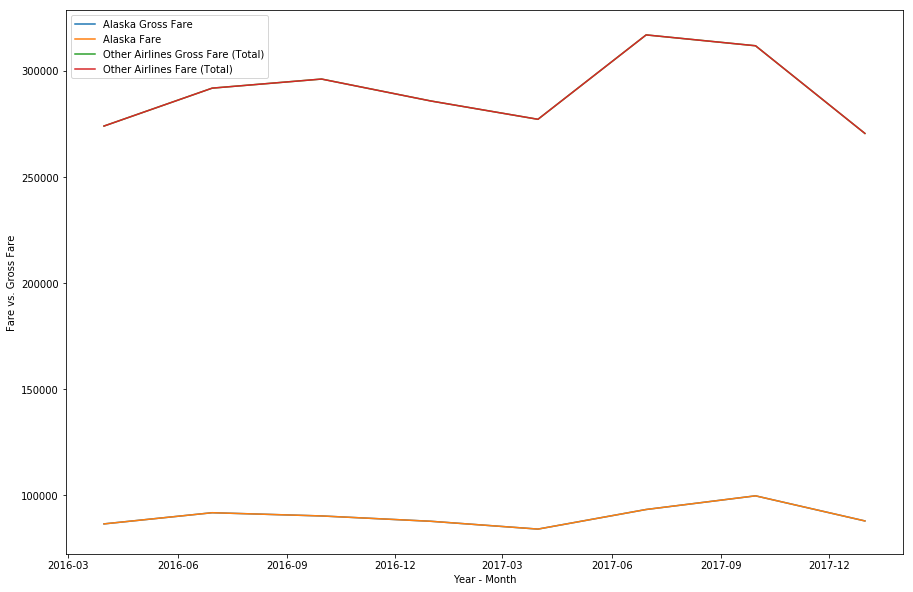

In [48]:
fig, ax = plt.subplots(figsize =(15,10))
plt.plot(grouped['Fare'], label='Alaska Gross Fare')
plt.plot(grouped['Fare'], label='Alaska Fare')
plt.plot(others['Fare'], label= "Other Airlines Gross Fare (Total)")
plt.plot(others['Fare'], label='Other Airlines Fare (Total)')
plt.xlabel("Year - Month")
plt.ylabel('Fare vs. Gross Fare')
plt.legend();

# Decomposition Model

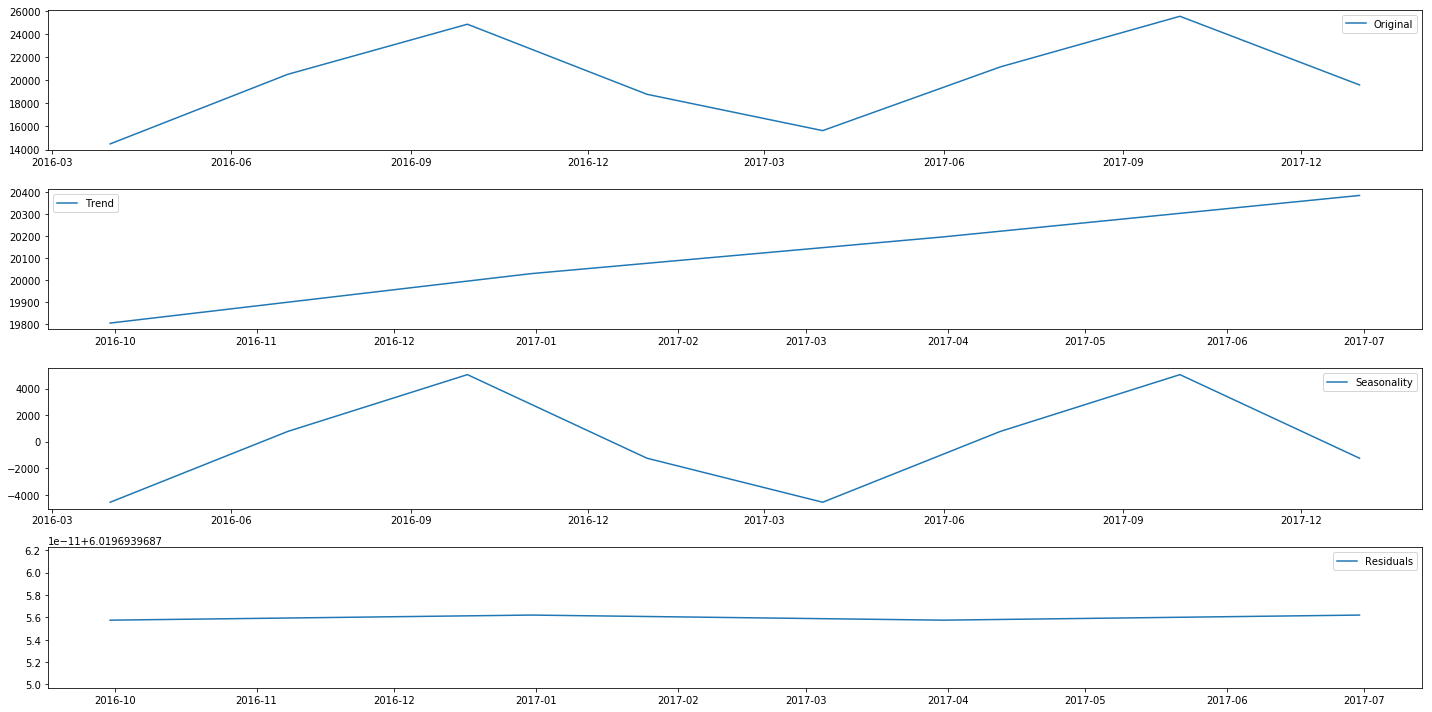

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(others_grouped)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, ax = plt.subplots(figsize =(20,10))
plt.subplot(411)
plt.plot(others_grouped, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



# Create Time Series Analysis, Other Airlines 

In [53]:
others_grouped = others["Passengers per Day"]
others_grouped.head()

Date
2016-03-31    14488.323868
2016-06-30    20517.652225
2016-09-30    24857.141120
2016-12-31    18786.484496
2017-03-31    15638.112158
Name: Passengers per Day, dtype: float64

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).std()
  


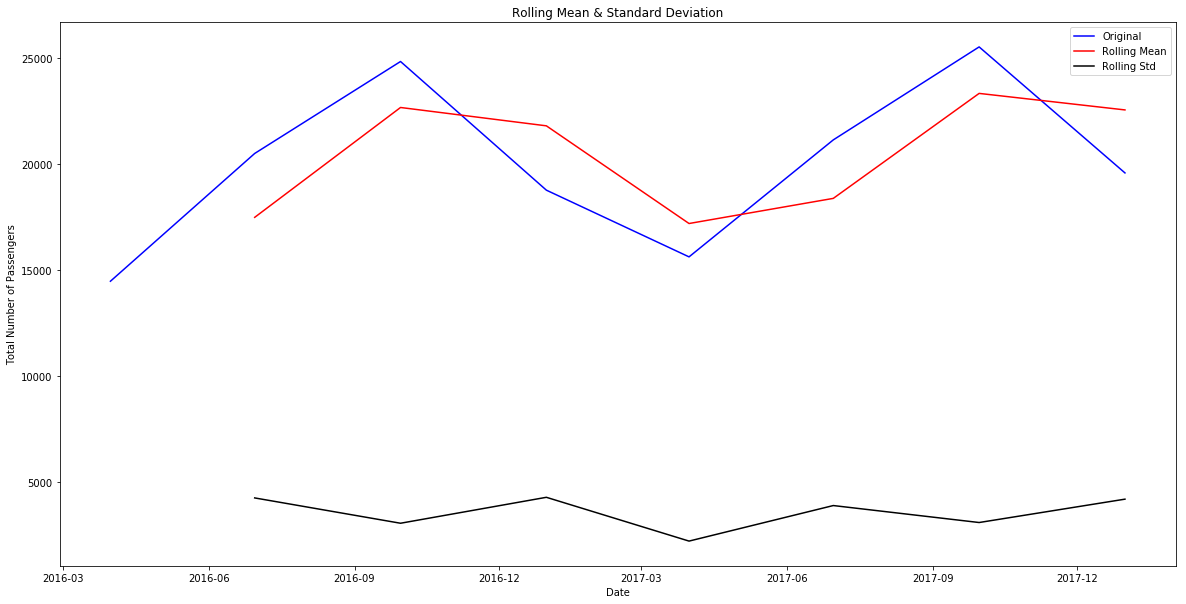

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      4.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [54]:
test_stationarity(others_grouped)

## Log Other Airlines

In [55]:
log_others_grouped = np.log(others_grouped)

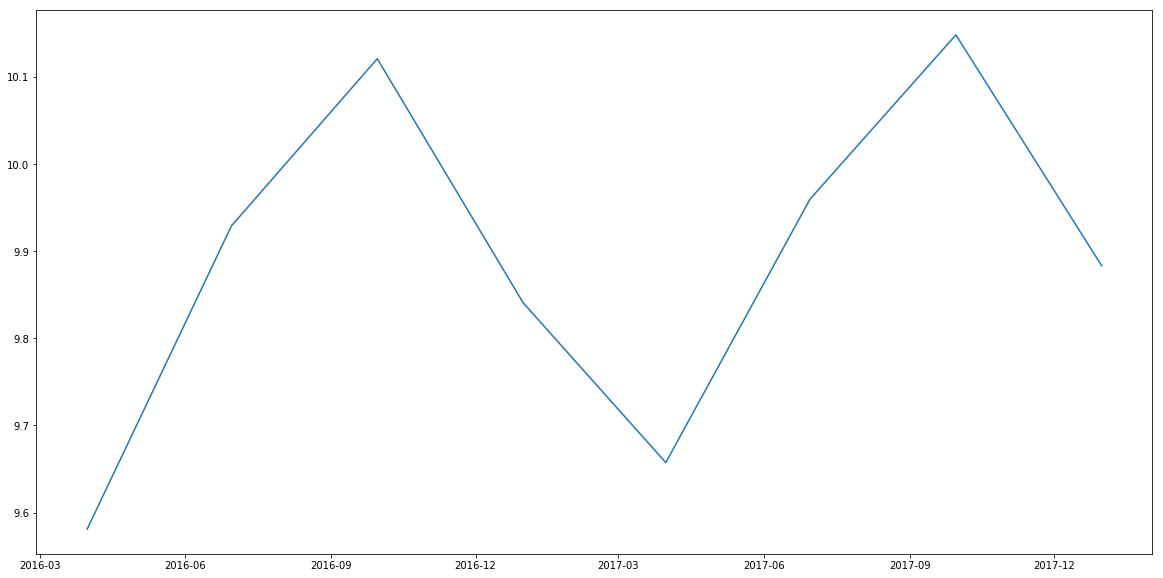

In [56]:
fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_others_grouped);

## Get Autocorrelation Plot

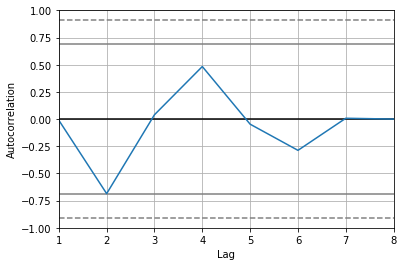

In [57]:
autocorrelation_plot(log_others_grouped);

## Create ARIMA Model

In [58]:
model_others = ARIMA(log_others_grouped, order=(1,1,0))

In [59]:
model_others_fit = model_others.fit(disp=0)
print(model_others_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Passengers per Day   No. Observations:                    7
Model:                   ARIMA(1, 1, 0)   Log Likelihood                  -0.358
Method:                         css-mle   S.D. of innovations              0.255
Date:                  Mon, 09 Jul 2018   AIC                              6.715
Time:                          18:28:47   BIC                              6.553
Sample:                      06-30-2016   HQIC                             4.710
                           - 12-31-2017                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0432      0.097      0.443      0.676      -0.148       0.234
ar.L1.D.Passengers per Day     0.0140      0.443      0.032      0.

              0
count  7.000000
mean  -0.000612
std    0.275062
min   -0.325253
25%   -0.266118
50%    0.141650
75%    0.203385
max    0.304786


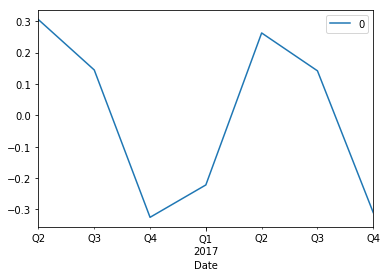

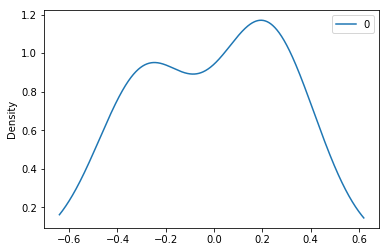

In [60]:
residuals_others = pd.DataFrame(model_others_fit.resid)
residuals_others.plot()
residuals_others.plot(kind='kde')
print(residuals_others.describe())

In [61]:
next_two_periods_others = np.exp(model_others_fit.forecast(steps=2)[0])

In [62]:
next_two_periods_others

array([ 20375.03725139,  21272.30011937])

In [63]:
print('The next two quarters we predict',sum(next_two_periods_AS), 'passengers/day on Alaska')
print('The next two quarters we predict',sum(next_two_periods_others), 'passengers/day on all other airlines')
print('Alaska has a',(sum(next_two_periods_AS)/(sum(next_two_periods_AS)+sum(next_two_periods_others))*100),'% market share')

The next two quarters we predict 36781.8446048 passengers/day on Alaska
The next two quarters we predict 41647.3373708 passengers/day on all other airlines
Alaska has a 46.8981617279 % market share
